In [146]:
#Import all the required Python libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [147]:
# Read the the Loan.csv file and load the dataset
loan_data = pd.read_csv('loan.csv', low_memory=False)

In [148]:
# Drop columns with a high percentage of missing values
missing_data = loan_data.isnull().sum()
columns_to_drop = missing_data[missing_data > 0.4 * len(loan_data)].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

In [149]:
# Fill missing values in 'annual_inc' with the mean of the column
loan_data_cleaned['annual_inc'].fillna(loan_data_cleaned['annual_inc'].mean(), inplace=True)

/var/folders/gd/qgs1mg1d463fgfys96gggsjw0000gn/T/ipykernel_3700/3445148295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_cleaned['annual_inc'].fillna(loan_data_cleaned['annual_inc'].mean(), inplace=True)


In [150]:
# Convert 'term' column to integer
loan_data_cleaned['term'] = loan_data_cleaned['term'].apply(lambda x: int(x.split()[0]))

# Convert 'int_rate' column to float
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%', '').astype(float)

# Convert 'loan_status' to categorical
loan_data_cleaned['loan_status'] = loan_data_cleaned['loan_status'].astype('category')

In [151]:
# Remove outliers for 'annual_inc' and 'loan_amnt' using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

loan_data_cleaned = remove_outliers_iqr(loan_data_cleaned, 'annual_inc')
loan_data_cleaned = remove_outliers_iqr(loan_data_cleaned, 'loan_amnt')

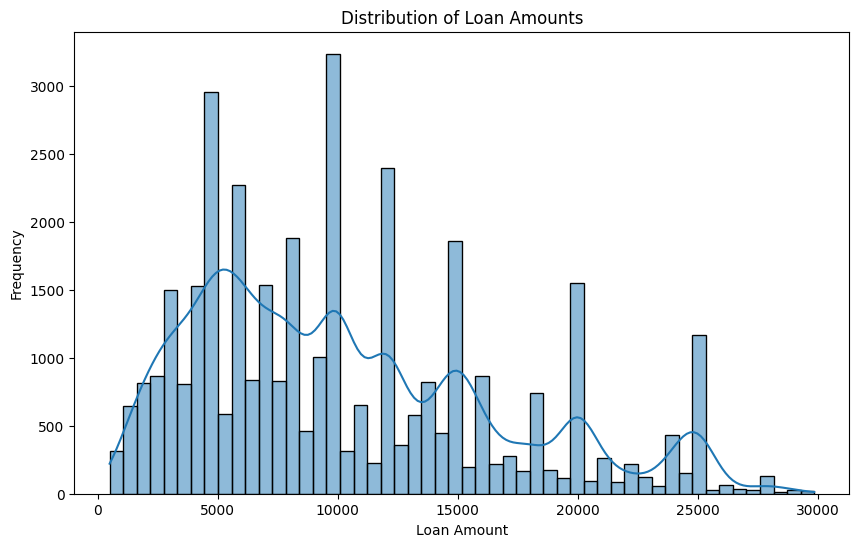

In [153]:
# Distribution of Loan Amounts
plt.figure(figsize=(10,6))
sns.histplot(loan_data_cleaned['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Comment: Most loans are distributed between 5,000 and 15,000. Higher loan amounts can increase the risk of default due to larger repayment amounts.


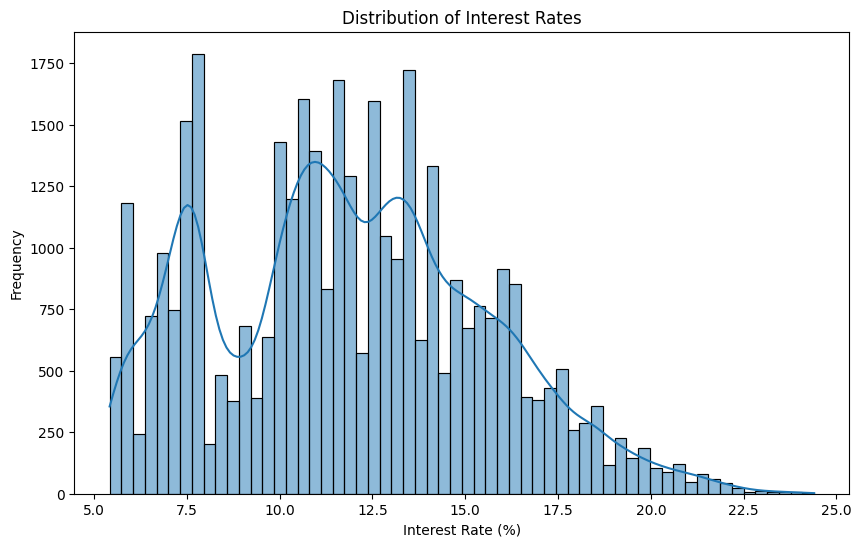

In [154]:
# Distribution of Interest Rates
plt.figure(figsize=(10,6))
sns.histplot(loan_data_cleaned['int_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Comment: Interest rates are mostly between 10% and 20%. Higher interest rates are associated with a higher likelihood of default.


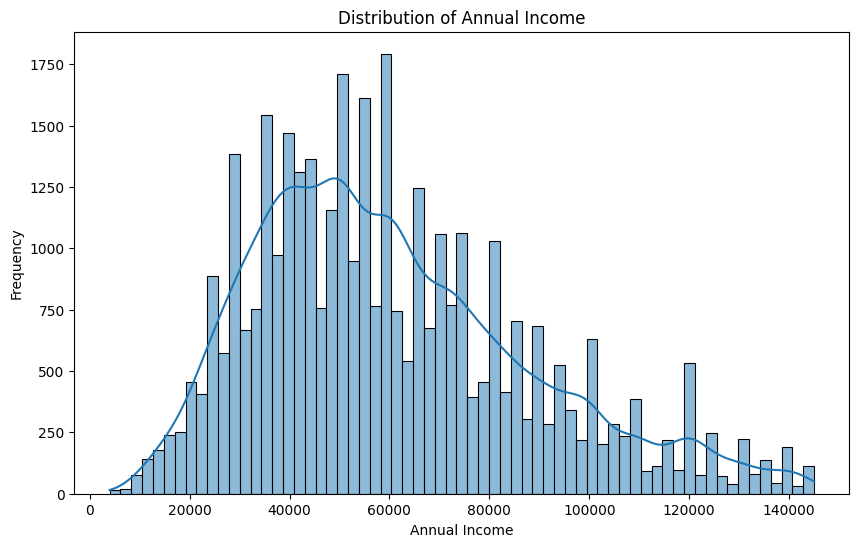

In [155]:
# Distribution of Annual Income
plt.figure(figsize=(10,6))
sns.histplot(loan_data_cleaned['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Comment: Most borrowers have an annual income between $40,000 and $80,000. Lower annual incomes can increase the risk of default due to less disposable income for loan repayments.


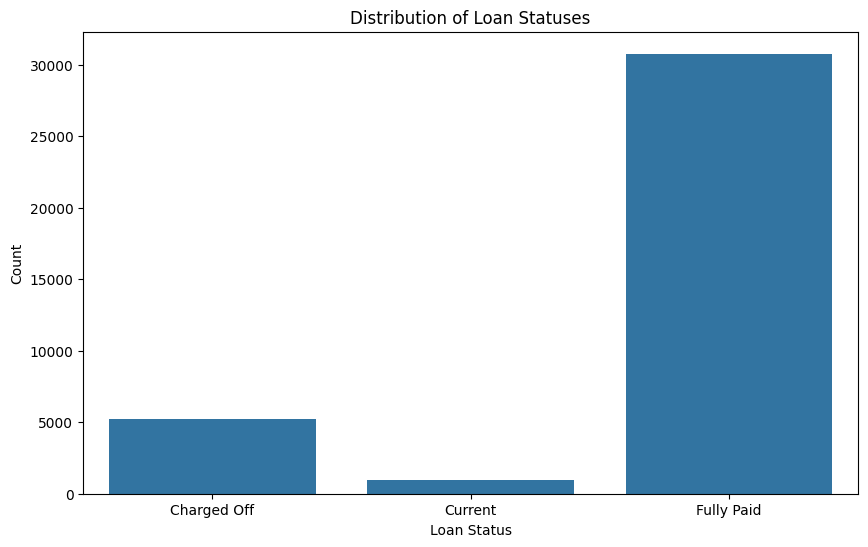

In [156]:
# Distribution of Loan Statuses
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status', data=loan_data_cleaned)
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Comment: This distribution shows the frequency of each loan status. Identifying defaulters ('Charged-off') helps in understanding the risk profile.

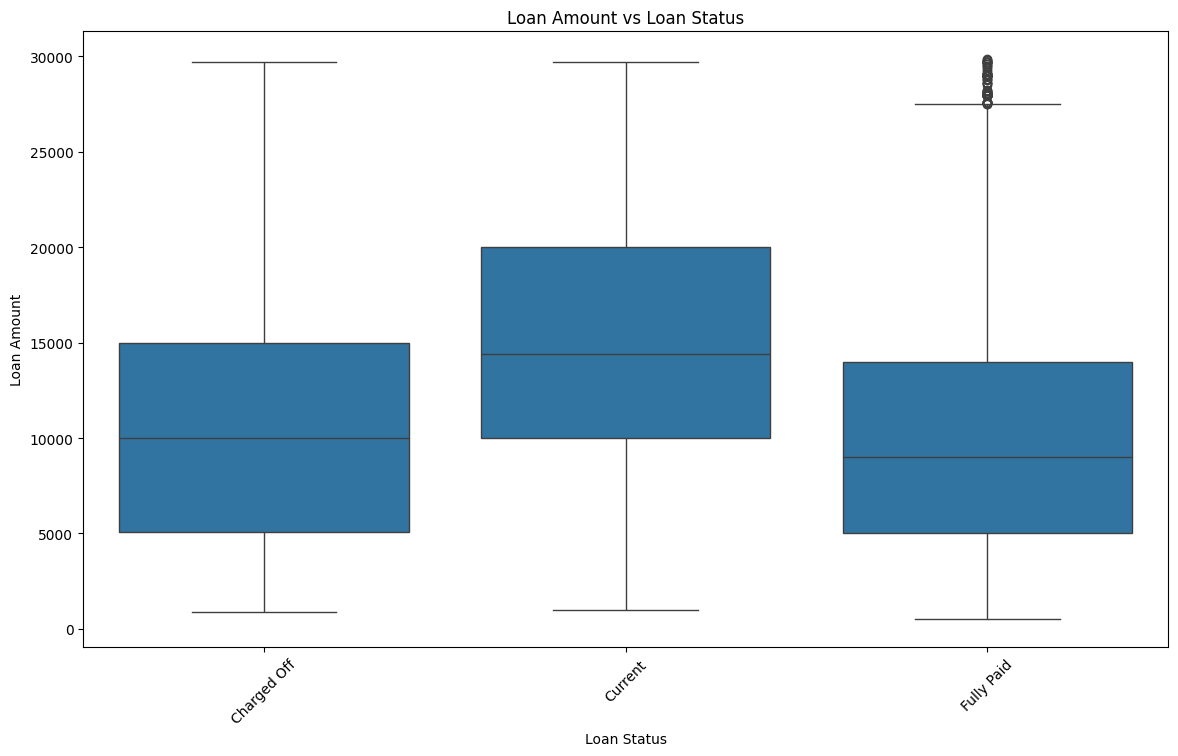

In [167]:
# Loan Amount vs Loan Status
plt.figure(figsize=(14,8))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_cleaned)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

# Comment: Higher loan amounts are more common among defaulters ('Charged-off'). This suggests larger loans have a higher risk of default.


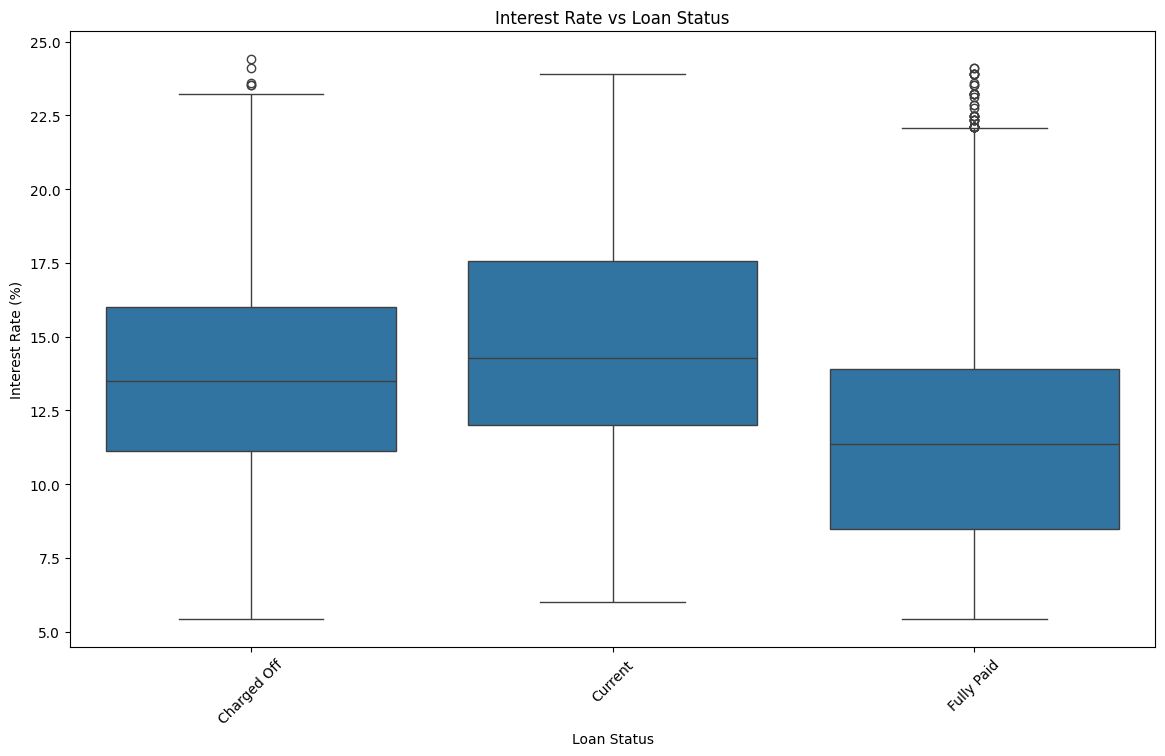

In [158]:
# Interest Rate vs Loan Status
plt.figure(figsize=(14,8))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Comment: Defaulters tend to have higher interest rates, indicating that higher interest rates are associated with a higher risk of default.


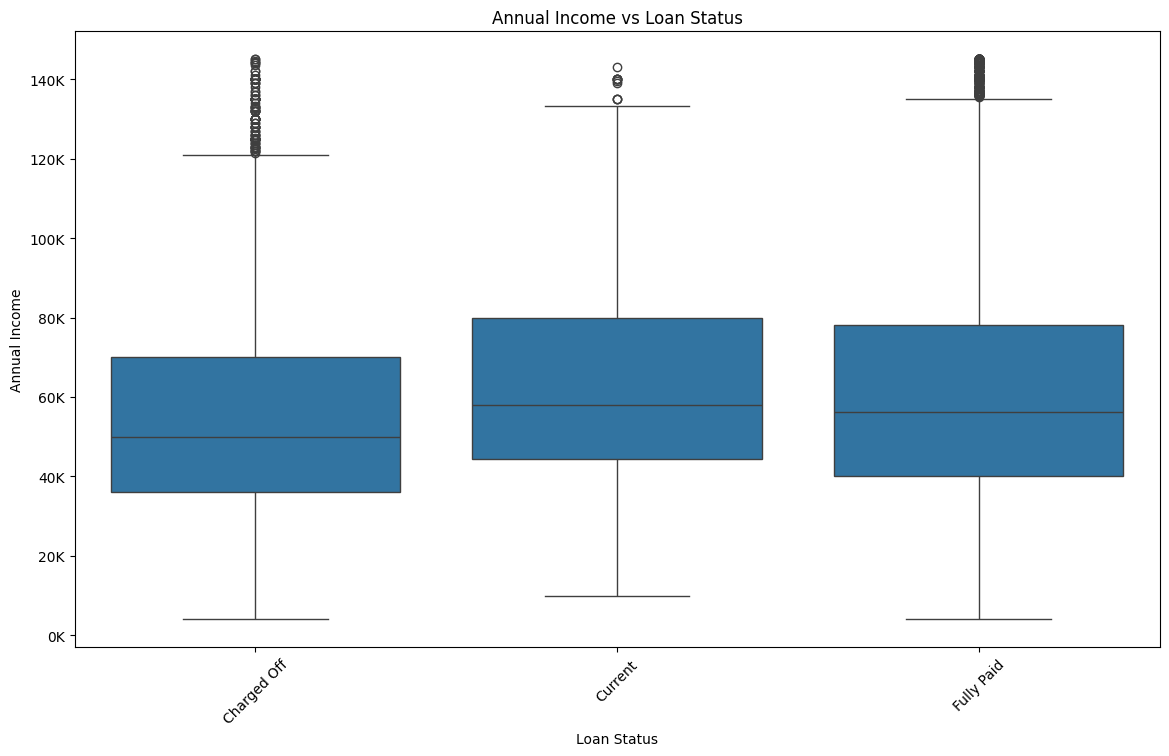

In [159]:
# Annual Income vs Loan Status
plt.figure(figsize=(14,8))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_cleaned)
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)

# Apply the formatter to the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}K'))
plt.show()

# Comment: Defaulters ('Charged-off') typically have lower annual incomes. Lower incomes can lead to higher default rates due to less financial stability.


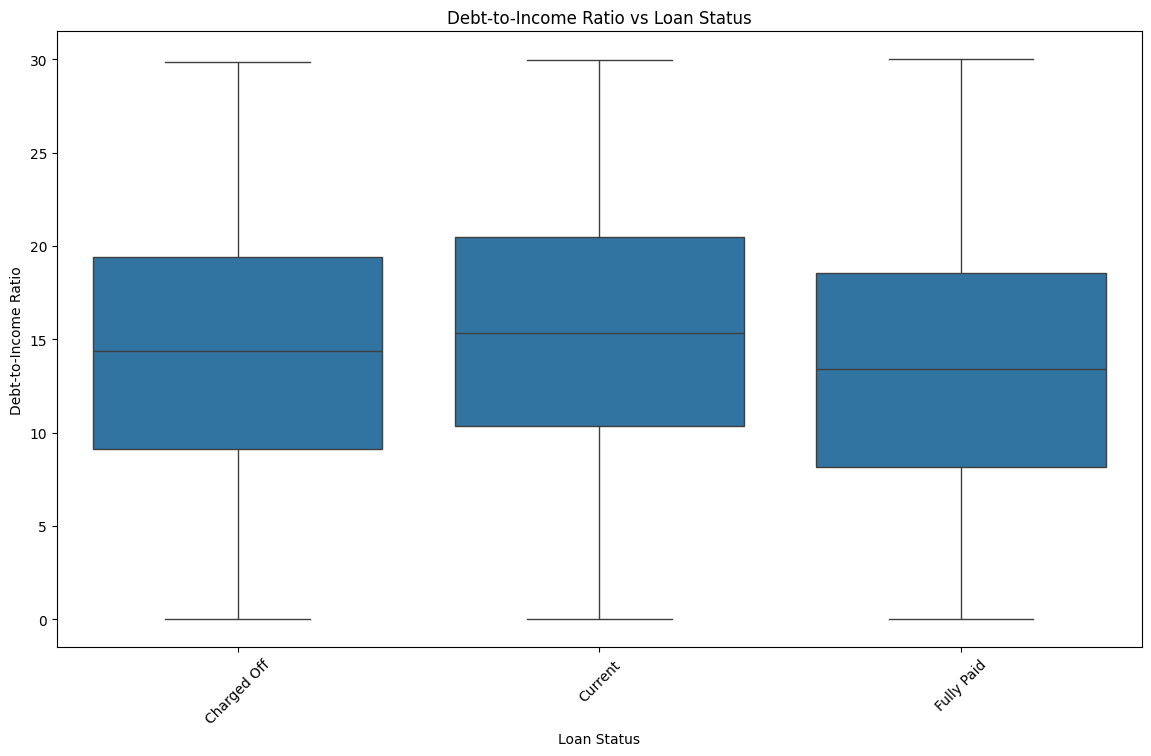

In [160]:
# Debt-to-Income Ratio vs Loan Status
plt.figure(figsize=(14,8))
sns.boxplot(x='loan_status', y='dti', data=loan_data_cleaned)
plt.title('Debt-to-Income Ratio vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

# Comment: Higher debt-to-income ratios are observed in defaulters, suggesting that higher DTI is a significant risk factor for loan default.


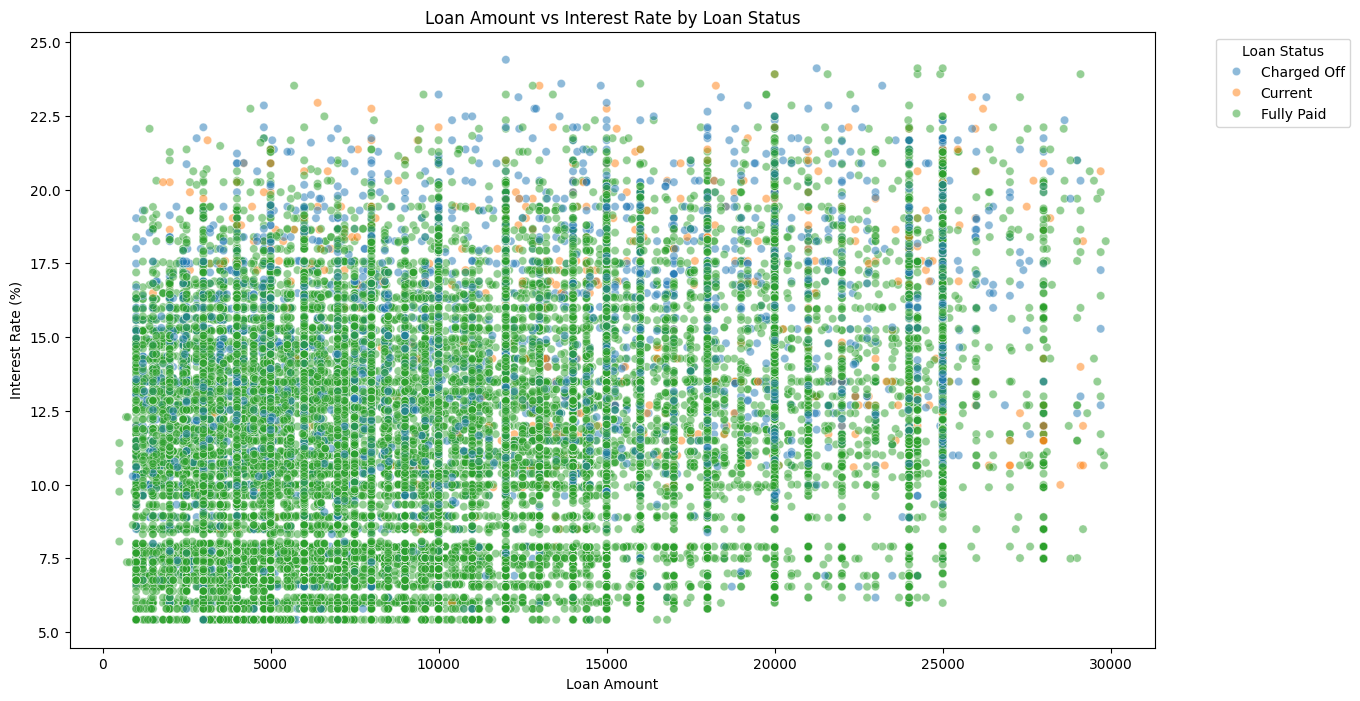

In [161]:
# Scatter Plot: Loan Amount vs Interest Rate colored by Loan Status
plt.figure(figsize=(14,8))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=loan_data_cleaned, alpha=0.5)
plt.title('Loan Amount vs Interest Rate by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Comment: This scatter plot shows the combined effect of loan amount and interest rate on loan status. Higher loan amounts and interest rates tend to be associated with higher default rates.

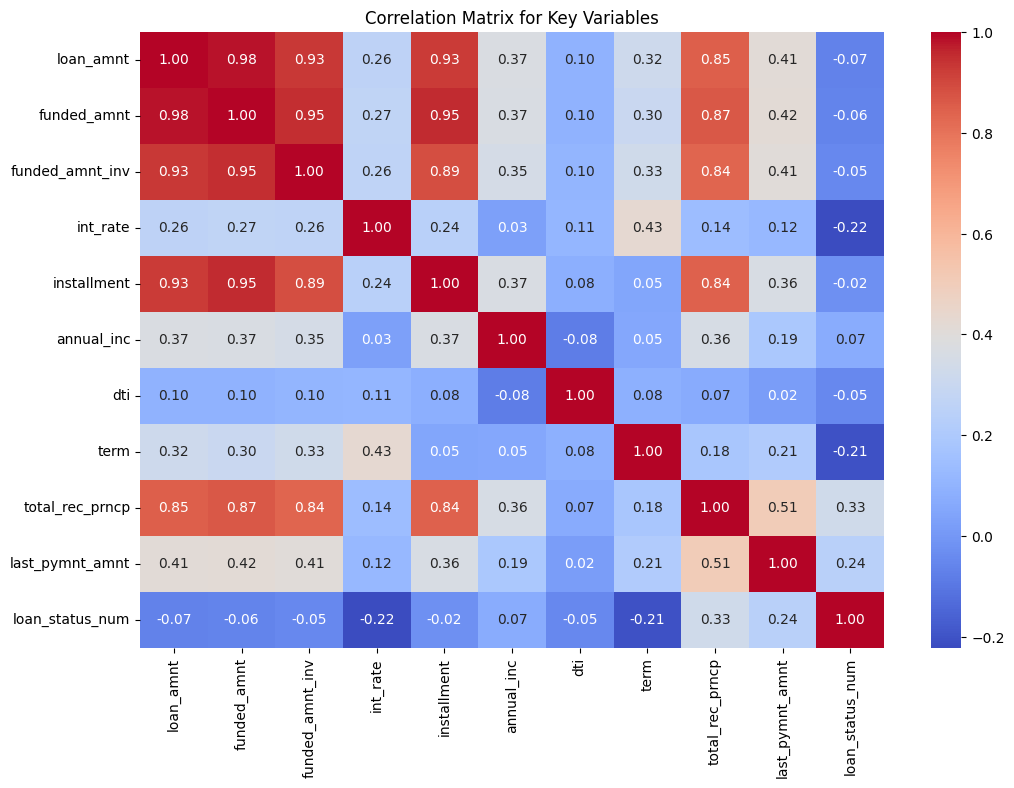

In [164]:
# Correlation matrix for selected key variables
loan_data_cleaned['loan_status_num'] = loan_data_cleaned['loan_status'].cat.codes
key_variables = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
                 'annual_inc', 'dti', 'term', 'total_rec_prncp', 'last_pymnt_amnt', 
                 'loan_status_num']

correlation_matrix = loan_data_cleaned[key_variables].corr()

# Plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Key Variables')
plt.show()